1.0


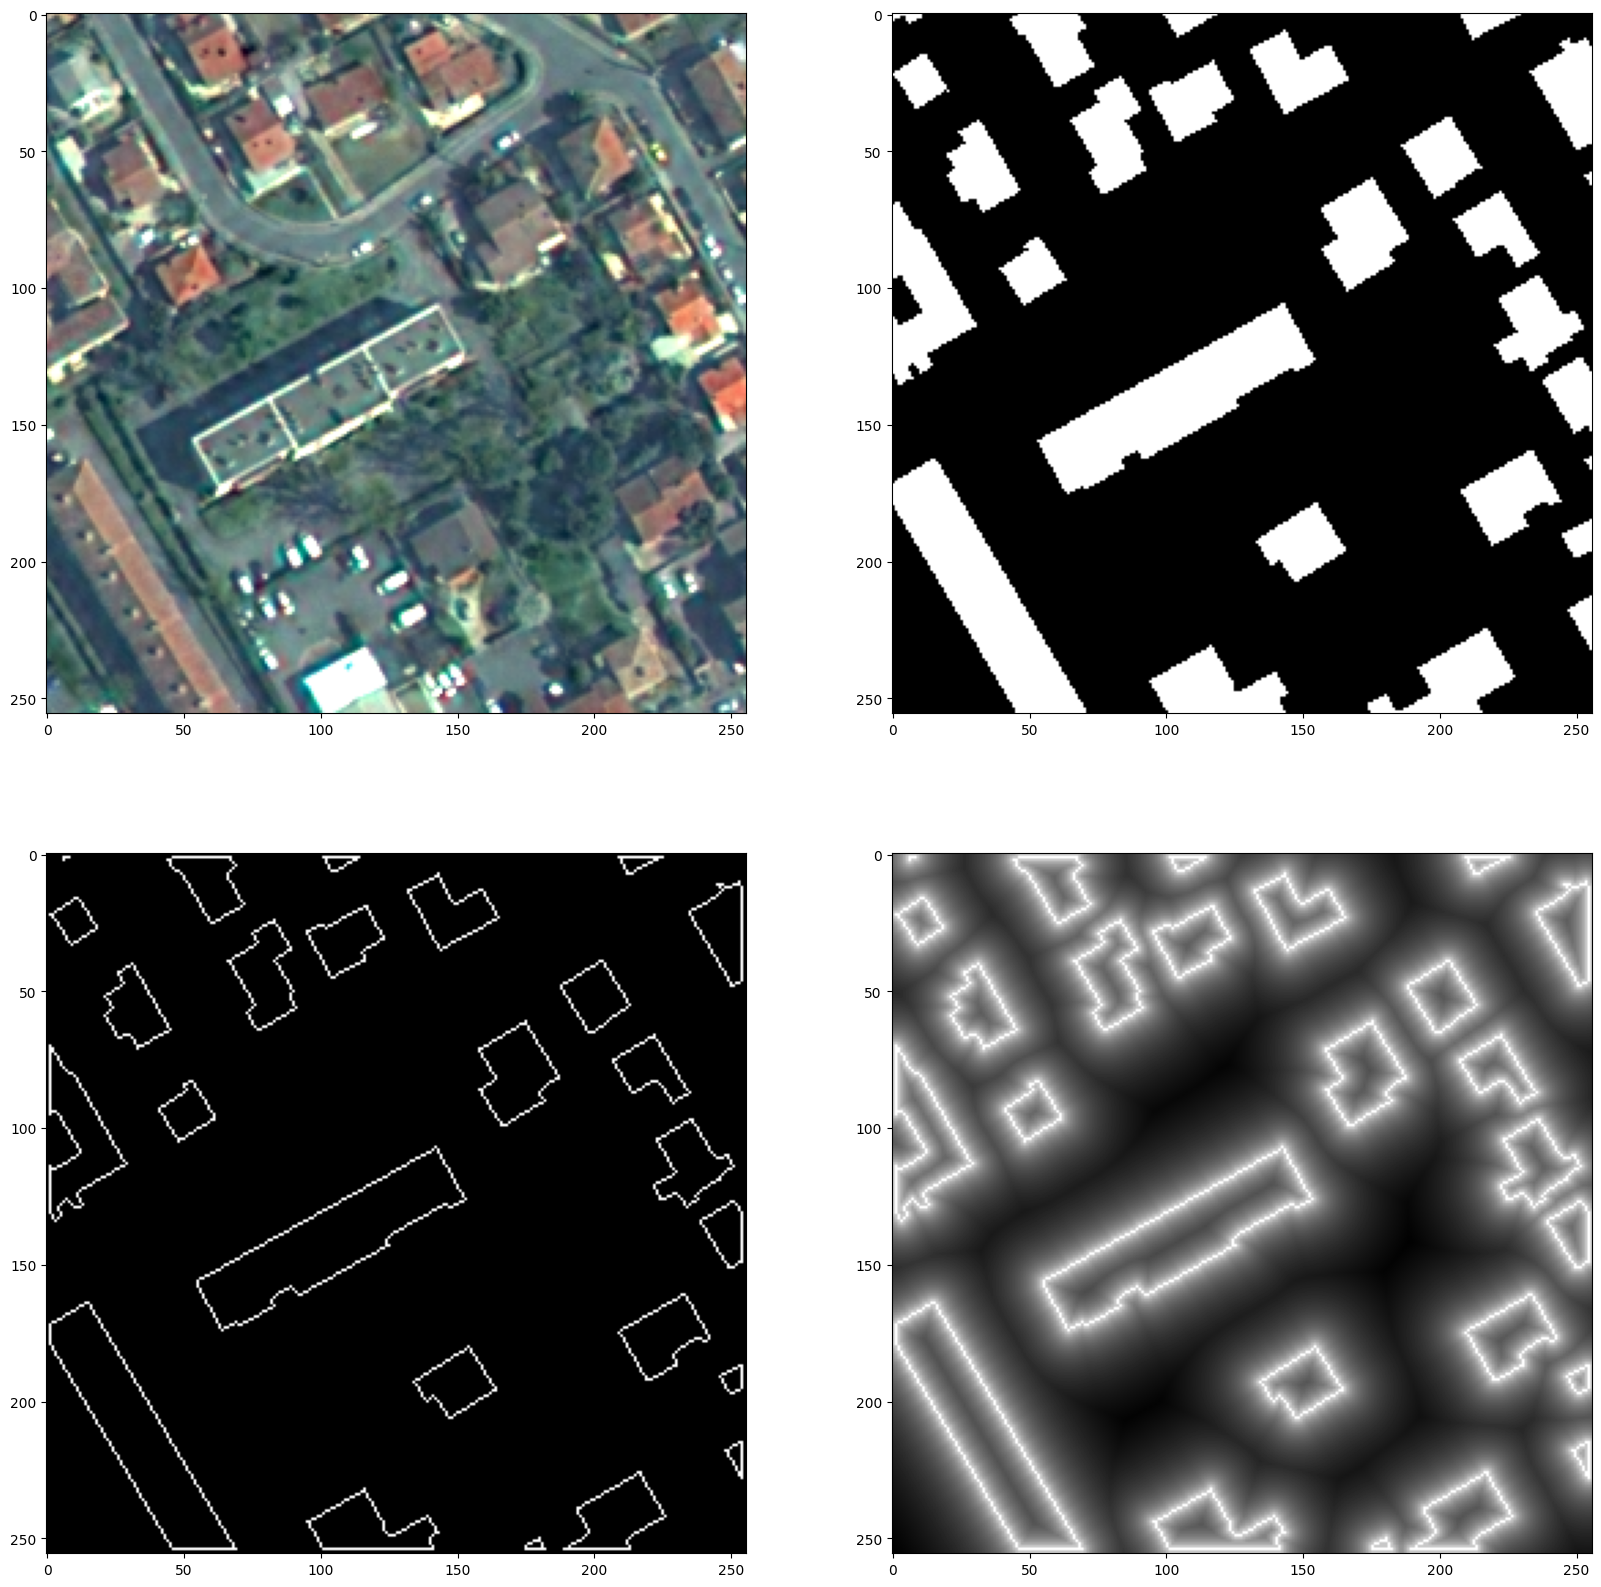

[[0.82220428 0.83459158 0.84927173 ... 0.78679344 0.78643759 0.78539079]
 [0.82317125 0.8359588  0.85133992 ... 0.79432823 0.79388963 0.79260507]
 [0.82317125 0.8359588  0.85133992 ... 0.80274156 0.80218837 0.80057794]
 ...
 [0.69242453 0.69398909 0.69558219 ... 0.7218871  0.72194259 0.7218871 ]
 [0.69159167 0.69311581 0.69466584 ... 0.71917191 0.71922309 0.71917191]
 [0.69073627 0.69221997 0.69372702 ... 0.71656484 0.7166122  0.71656484]]


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.windows import Window
from scipy import ndimage

with rasterio.open("/data/SemCity-Toulouse-bench/semantic_05/TLS_indMap/TLS_indMap_08_1.tif") as f:
    label = np.transpose(f.read(window=Window(512, 512, 256, 256)))

with rasterio.open("/data/SemCity-Toulouse-bench/img_multispec_05/TLS_BDSD_RGB/TLS_BDSD_RGB_08.tif") as f:
    img = np.transpose(
        f.read(window=Window(512, 512, 256, 256))
    )
building = (label==2).squeeze().astype(int)
eroded = ndimage.binary_erosion(building).astype(int)
edges = eroded - ndimage.binary_erosion(eroded)
weights1 = ndimage.gaussian_filter(edges.astype(float), sigma=3)*200.
dist = ndimage.distance_transform_edt(1-edges)+1
weights2 = 1/dist**0.1
print(np.max(weights2))

#kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
#edges = ndimage.convolve(building, weights=kernel)
#edges = np.clip(edges, 0, 255).astype(np.uint8)

#dist = ndimage.distance_transform_edt(building)
#dist[dist <= 2] = 0
#dist[dist > 2] = 1
#

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(img)
ax2.imshow(building, cmap="gray")
ax3.imshow(edges, cmap="gray")
ax4.imshow(weights2, cmap="gray")
plt.show(block=True)
print(weights2)